# Matplotlib 실습
먼저 matplotlib.pyplot을 import한다. 실습에 필요한 numpy도 import한다.  
jupyter notebook에서 plot이 바로 표시 될 수 있도록 매직 명령어를 사용한다. 
> %matplotlib inline

## pyplot
파이플롯 소개  
- matplotlib.pyplot  matplotlib가 MATLAB처럼 작동하도록 하는 함수 모음이다. 
- pyplot API는 일반적으로 객체 지향 API보다 유연성이 떨어진다. 
- pyplot으로 시각화를 생성하는 것은 매우 빠르다.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

%matplotlib inline

## 객체 지향 인터페이스와 pyplot 인터페이스

Matplotlib를 사용하는 기본적으로 두 가지 방법이 있다.

* 객체 지향 스타일 : 명시적으로 그림과 축을 만들고 이에 대한 메서드를 호출한다.
* pyplot : pyplot을 사용하여 그림과 축을 자동으로 생성 및 관리하고 그래프를 plotting한다.

### 객체지향 object-oriented style

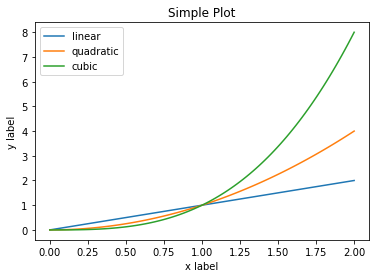

In [3]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

### pyplot style

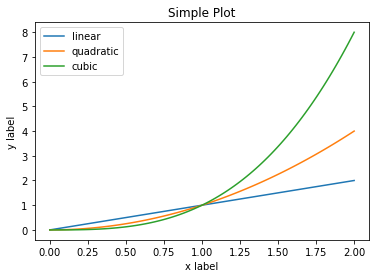

In [4]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

객체지향 스타일과 pyplot 접근 방식(동일하게 강력함)을 모두 사용할 수 있다. 둘 중 하나를 자유롭게 사용한다. 일반적으로 둘 다 사용 가능하지만 하나의 스타일로 통일하는 것이 읽기 쓰기 쉽다.

간단히 다음과 같은 sine 함수 그래프와 cosine함수 그래프를 그려보자.

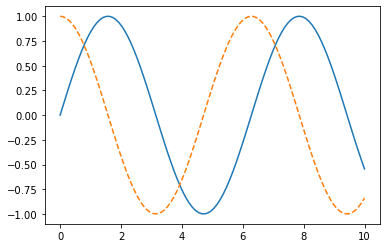

In [5]:
x = np.linspace(0,10,100) # 0~10 등분을 해서 숫자 100개 생성

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

subplot 기능을 활용하여 sine함수와 cosine함수 그래프를 다음과 같이 그려보자

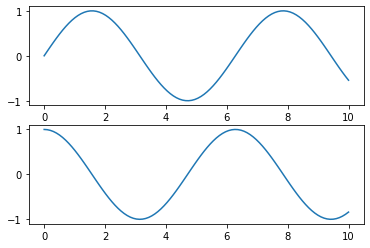

In [6]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(x, np.sin(x))

plt.subplot(212)
plt.plot(x, np.cos(x))

플롯의 선 색상과 스타일을 다음과 같이 바꾸어서 그려보자.
- color : r,g,b,c,y,m,k,w
- linestyle : -, --, :, o, ^ 

In [7]:
?plt.plot # 온라인 도움말 보자!

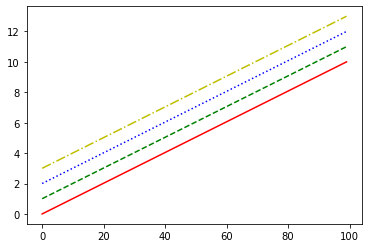

In [7]:
plt.plot(x, 'r-')
plt.plot(x+1, 'g--')
plt.plot(x+2, 'b:')
plt.plot(x+3, 'y-.')

plt.xlim()과 plt.ylim() 을 사용하여 x축과 y축을 제한 할 수 있다.  
sine 그래프를 그리고 x축을 -1 ~ 11로 하고 y축을 -1.5 ~ 1.5로 나타내 보자.

(-1.5, 1.5)

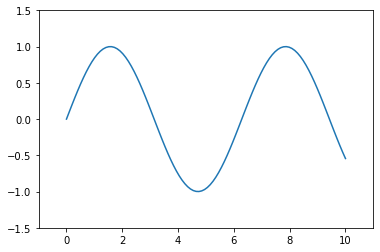

In [8]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

x축과 y축의 비율을 동일하게 맞출 수 있다. 

(-0.5, 10.5, -1.0993384025373631, 1.0996461858110391)

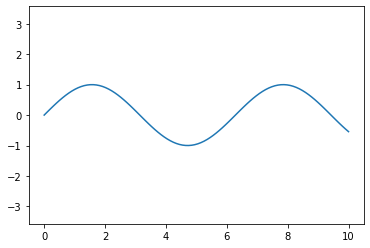

In [9]:
plt.plot(x, np.sin(x))
plt.axis('equal')

x축과 y축에 label을 추가하고 그래프의 제목을 추가한다.

Text(0, 0.5, 'sin(x)')

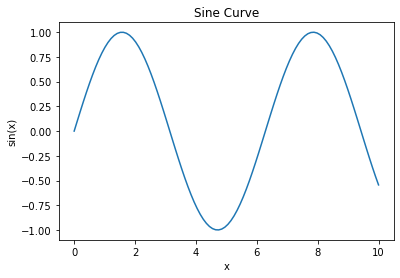

In [10]:
plt.plot(x, np.sin(x))
plt.title('Sine Curve')
plt.xlabel('x')
plt.ylabel('sin(x)')

Legend의 표시  
각 그래프 선에 대해서 label을 붙이고 그래프에서 legend로 표시한다.  
legend loc 옵션 : 'upper right', 'upper left', 'lower left','lower right' 등으로 위치 지정 가능하다.

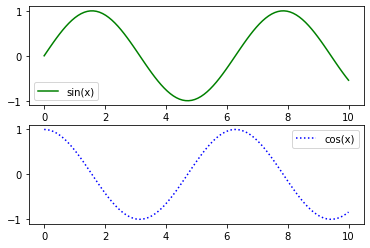

In [11]:

plt.subplot(2,1,1)
plt.plot(x, np.sin(x), '-g', label ='sin(x)')
plt.legend(loc='lower left')
plt.subplot(2,1,2)
plt.plot(x, np.cos(x), ':b', label ='cos(x)')
plt.legend()

### 다중 서브플롯
* 서로 다른 데이터 뷰를 비교
* plt.subplot : 간단한 서브플롯의 그리드
* plt.tight_layout() : 서브플롯 간격유지

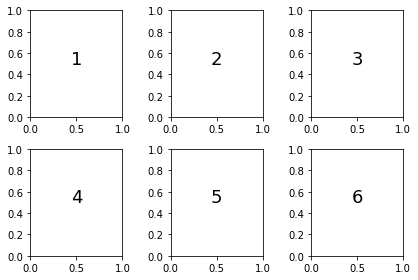

In [9]:
for i in range(1,7): #  subplot을 여러개 생성하기 위해서 반복문을 사용
    plt.subplot(2,3,i)
    plt.text(0.5, 0.5, str(i), fontsize=18, ha='center') # 그래프에 문자열을 출력함
plt.tight_layout() # 축 겹치지 않게 재배치

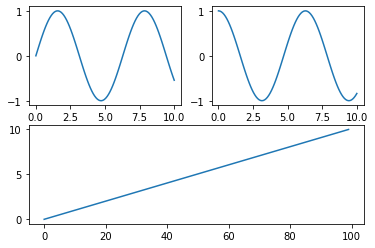

In [13]:
plt.subplot(2,2,1); plt.plot(x, np.sin(x))
plt.subplot(2,2,2); plt.plot(x, np.cos(x))
plt.subplot(2,1,2); plt.plot(x)

plt.show()

## Matplotlib rcParams 

### 동적 rc 설정 
파이썬 스크립트에서 또는 파이썬 셸에서 대화식으로 기본 rc 설정을 동적으로 변경할 수도 있다.  
모든 rc 설정은 matplotlib.rc 라고 불리는 dictionary-like 변수에 저장되어 있다.  
rcParams는 다음과 같이 직접 수정할 수 있다.

참고) https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams

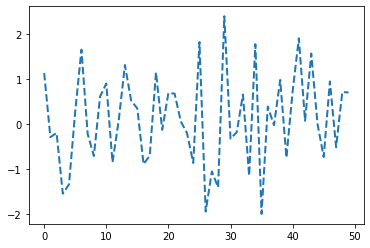

In [14]:
data = np.random.randn(50)

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot(data)

### 텍스트 작업 
text임의의 위치에서 텍스트를 추가 할 수 있고 xlabel, ylabel그리고 title표시된 위치에 텍스트를 추가하는 데 사용된다. 

matplotlib는 모든 텍스트 표현식에서 TeX 표현식을 허용한다. 

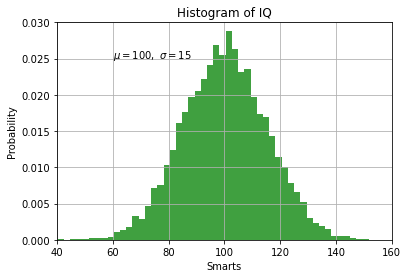

In [15]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### annotation 주석 달기

텍스트의 일반적인 용도는 플롯의 일부 기능에 주석을 추가하는 것이며 이 annotate메서드는 주석을 쉽게 만드는 도우미 기능을 제공한다.

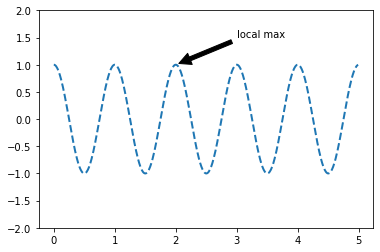

In [16]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

## 한글폰트의 설정

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [11]:
print ('설정파일 위치: ', matplotlib.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf') # 설치된 폰트

설정파일 위치:  C:\Users\aoneko\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [21]:
# 나눔고딕 폰트
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothic.ttf')]

#### fontproperties
특정 한글 폰트를 지정하여 사용하고 싶은 부분에서 fontproperties를 지정하는 방법

Text(0.5, 1.0, '테스트')

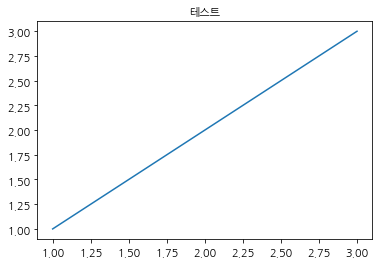

In [24]:
path = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path)
plt.plot([1,2,3], [1,2,3])
plt.title('테스트', fontproperties=fontprop)

#### 전역글꼴 설정 방법

In [22]:
# matplotlib.rcParams[]으로 전역글꼴 설정 방법
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 11

Text(0.5, 1.0, '테스트')

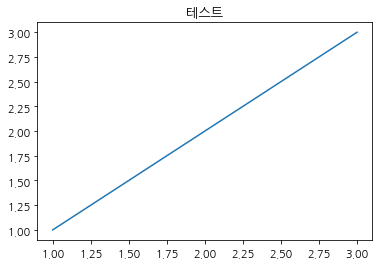

In [23]:
plt.plot([1,2,3], [1,2,3])
plt.title('테스트')